## Movie Review Sentiment Detection

### CountVectorizer with Logistic Regression

In [2]:
# importing libraries
import pandas as pd
import numpy as np

In [3]:
# reading files
train_data = pd.read_csv('G:/internshala/signzy_kaggle/labeledTrainData.tsv', delimiter = '\t', quoting = 3)
test_data = pd.read_csv('G:/internshala/signzy_kaggle/testData.tsv', delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
# data cleaning
# Movie reviews contains some HTML tags, so here i used BeautifulSoup to remove those tags.
import re
import nltk
from bs4 import BeautifulSoup 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#preprocessing is a function defined to clean all the train data and test data from any punctuations, numbers, 
#tags etc and contains only the letter.
def preprocessing(dataset):
    corpus = []
    for i in range(0,len(dataset)):
        Review = BeautifulSoup(dataset['review'][i]).get_text()
        Review = re.sub('[^a-zA-Z]', ' ', Review)
        Review = Review.lower()     # converts all the letters in small letter
        Review = Review.split()
        ps = PorterStemmer()
        Review = [ps.stem(word) for word in Review if not word in set(stopwords.words('english'))]  
        # it is checking for any stopwords and then converting the word into its root.
        Review = ' '.join(Review)
        corpus.append(Review)
    return corpus       # corpus is list that contains the cleaned reviews.

[nltk_data] Downloading package stopwords to C:\Users\prashant
[nltk_data]     bajetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Cleaning both train and test data and saving in train_clean_reviews and test_clean_reviews.
train_clean_reviews = preprocessing(train_data)
test_clean_reviews = preprocessing(test_data)

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\prashant bajetha\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [ ]:
#pd.read_csv('C:/Users/prashant bajetha/train_data.csv')
train_reviews = pd.read_csv('G:/internshala/signzy_kaggle/train_cleaned_df.csv')
train_reviews.drop(train_reviews.columns[[0]],axis =1,inplace = True)
#train_clean_reviews = train_reviews.review.tolist()

In [ ]:
train_reviews['label'] = train_data['sentiment']
train_reviews.head()

### Most Common words in the entire dataset. Here the most frequent words appear in large size and less frequent words appear in small size

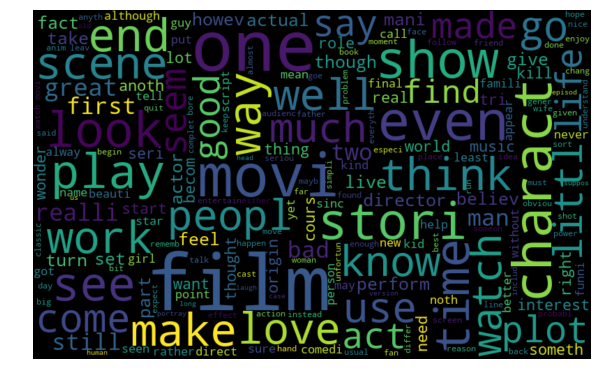

In [7]:
import matplotlib.pyplot as plt 

all_words = ' '.join([text for text in train_clean_reviews])
from wordcloud import WordCloud
type(all_words)
wordcloud = WordCloud(width = 800, height = 500, random_state = 27,max_font_size = 110).generate(all_words)
plt.figure(figsize =(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

The above visualization doesn't provide much information. So we separately visualize most frequent words in positive and negative reviews,

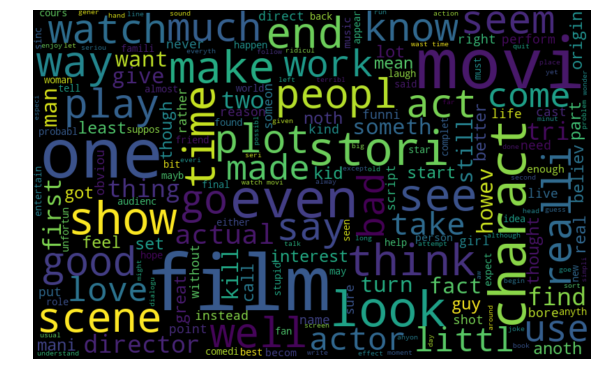

In [8]:
train_clean_reviews_label = pd.DataFrame()
train_clean_reviews_label['review'] = train_clean_reviews
train_clean_reviews_label['label'] = train_data['sentiment']

negative_words =  ' '.join([text for text in train_clean_reviews_label['review'][train_clean_reviews_label['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 27,max_font_size = 110).generate(negative_words)
plt.figure(figsize =(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

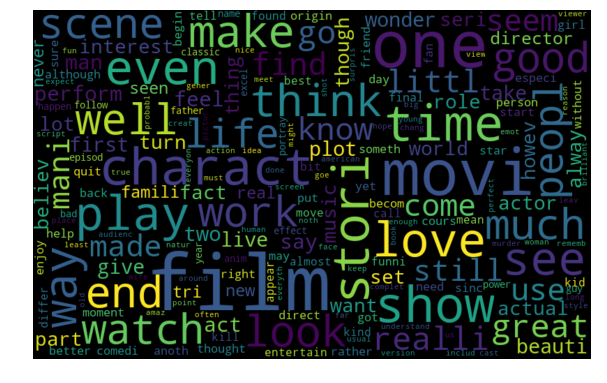

In [9]:
positive_words =  ' '.join([text for text in train_clean_reviews_label['review'][train_clean_reviews_label['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 27,max_font_size = 110).generate(positive_words)
plt.figure(figsize =(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Vectorization

Words needed to be encoded as integers or floating points values for use as an input to Machine Learning algorithm. This process is called **vectorization**.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = True)
cv.fit(train_clean_reviews)
X = cv.transform(train_clean_reviews)
X_test = cv.transform(test_clean_reviews)
y = train_data.iloc[:,1].values     # target values of train_data

Most text categorization problems are linearly separable so i am fitting logistic regression. Grid Search is used to find the optimal hyperparameters.

In [14]:
### Logistic Regression
#Grid search for finding the optimal parameters for LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_test1 = {
 'C':[0.01,0.05,0.25,0.5,1]
}
gsearch1 = GridSearchCV(estimator = LogisticRegression(),param_grid = param_test1,scoring = 'roc_auc',
                        n_jobs=-1,iid=False, cv=10)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


({'C': 0.05}, 0.9475588480000001)

Here, we have tried different values of **C** to improve to know the best parameter. The parameter with **C** values gives roc auc score of 0.9475. 

In [15]:
# fitting with optimal value
opt_lr = LogisticRegression(C = 0.05) # optimal LogisticRegression model
opt_lr.fit(X,y)
y_pred = opt_lr.predict(X_test)

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['label'] = y_pred
submission.to_csv('final_submission.csv')
submission.head()

,id,label
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


Here i have tried CountVectorizer for feature extraction. It simply counts the number of times a word appears in a document. 

A slightly better accuracy is obtained by having 3 set of consecutive words(ngram_range=(1,3) as a parameter in CountVectorizer) and also training with only 15000 features(max_features = 15000) which makes the computation very fast.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = True,ngram_range = (1,3),max_features = 15000)
cv.fit(train_clean_reviews)
#len(cv.get_feature_names())

X = cv.transform(train_clean_reviews)
X_test = cv.transform(test_clean_reviews)   
y = train_data.iloc[:,1].values

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_test1 = {
 'C':[0.01,0.05,0.25,0.5,1]
}
gsearch1 = GridSearchCV(estimator = LogisticRegression(),param_grid = param_test1,scoring = 'roc_auc',
                        n_jobs=-1,iid=False, cv=10,verbose =2)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.7s finished
C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


({'C': 0.05}, 0.951608832)

In [21]:
opt_lr = LogisticRegression(C = 0.05) # optimal LogisticRegression model
opt_lr.fit(X,y)
y_pred1 = opt_lr.predict(X_test)
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['label'] = y_pred1
submission.to_csv('final_submission1.csv')

submission.head()

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,id,label
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",0
4,"""12128_7""",1
